In [114]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

# Create Features
X=np.array([-7.,-4.,-1.,2.,5.,8.,11.,14.])
Y=np.array([3.,6.,9.,12.,15.,18.,21.,24])

2.3.0


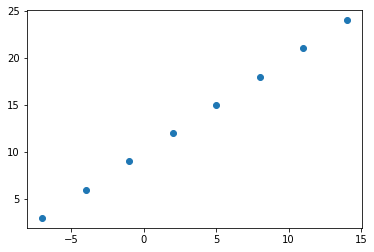

In [115]:
# Visualize it
plt.scatter(X,Y)

In [116]:
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([93700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([93700])>)

In [117]:
input_shape= X.shape
output_shape = Y.shape
input_shape,output_shape

((8,), (8,))

In [118]:
# Turn our Numpy arrays into tensors
x= tf.constant(X,dtype=tf.float32)
y= tf.constant(Y,dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [119]:
input_shape= x[0].shape
output_shape = y[0].shape
input_shape,output_shape
# It does not have any dimension, it means it is scatter

(TensorShape([]), TensorShape([]))

# Steps in modelling with TensorFlow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X&Y (features and labels)

In [120]:
# Optionally, the first layer can receive and input shape argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8,input_shape=(16,)))
#Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8,input_shape=(16,)))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# this operation as same model=tf.keras.Sequential([tf.keras.layers.Dense(1)])

In [121]:
tf.random.set_seed(42)
model=tf.keras.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),#stochastic gradient descent
              metrics=["mae"])
# fit the model
model.fit(x,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 998us/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 0s/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 0s/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 0s/step 

1/1 [==============================] - 0s 1ms/step - loss: 6.9488 - mae: 6.9488
Epoch 89/100
1/1 [==============================] - 0s 999us/step - loss: 6.9431 - mae: 6.9431
Epoch 90/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9375 - mae: 6.9375
Epoch 91/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9319 - mae: 6.9319
Epoch 92/100
1/1 [==============================] - 0s 1000us/step - loss: 6.9263 - mae: 6.9263
Epoch 93/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9206 - mae: 6.9206
Epoch 94/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9150 - mae: 6.9150
Epoch 95/100
1/1 [==============================] - 0s 0s/step - loss: 6.9094 - mae: 6.9094
Epoch 96/100
1/1 [==============================] - 0s 0s/step - loss: 6.9038 - mae: 6.9038
Epoch 97/100
1/1 [==============================] - 0s 1ms/step - loss: 6.8981 - mae: 6.8981
Epoch 98/100
1/1 [==============================] - 0s 0s/step - loss: 6.8925 - 

In [122]:
# Check out X and Y
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [123]:
model.predict([17.0])

array([[30.158512]], dtype=float32)

# Improving our model


In [124]:
# we can improve our model, by altering the steps we took to create a model

# 1. Create a model as above
model= tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(lr=0.01), # optimizer has been changed as Adam
             metrics=["mae"])
# 3. Fit the model (this time we'll train for longer)
model.fit(x,y,epochs=97)

Epoch 1/97
1/1 [==============================] - 0s 1000us/step - loss: 14.6466 - mae: 14.6466
Epoch 2/97
1/1 [==============================] - 0s 1ms/step - loss: 13.9532 - mae: 13.9532
Epoch 3/97
1/1 [==============================] - 0s 1000us/step - loss: 13.2603 - mae: 13.2603
Epoch 4/97
1/1 [==============================] - 0s 0s/step - loss: 12.5659 - mae: 12.5659
Epoch 5/97
1/1 [==============================] - 0s 999us/step - loss: 11.8675 - mae: 11.8675
Epoch 6/97
1/1 [==============================] - 0s 0s/step - loss: 11.1621 - mae: 11.1621
Epoch 7/97
1/1 [==============================] - 0s 0s/step - loss: 10.4475 - mae: 10.4475
Epoch 8/97
1/1 [==============================] - 0s 0s/step - loss: 9.7214 - mae: 9.7214
Epoch 9/97
1/1 [==============================] - 0s 0s/step - loss: 8.9817 - mae: 8.9817
Epoch 10/97
1/1 [==============================] - 0s 0s/step - loss: 8.2262 - mae: 8.2262
Epoch 11/97
1/1 [==============================] - 0s 0s/step - loss: 7.4

1/1 [==============================] - 0s 0s/step - loss: 0.5325 - mae: 0.5325
Epoch 91/97
1/1 [==============================] - 0s 0s/step - loss: 0.4389 - mae: 0.4389
Epoch 92/97
1/1 [==============================] - 0s 1ms/step - loss: 0.2560 - mae: 0.2560
Epoch 93/97
1/1 [==============================] - 0s 1000us/step - loss: 0.5795 - mae: 0.5795
Epoch 94/97
1/1 [==============================] - 0s 1ms/step - loss: 0.7585 - mae: 0.7585
Epoch 95/97
1/1 [==============================] - 0s 0s/step - loss: 0.6773 - mae: 0.6773
Epoch 96/97
1/1 [==============================] - 0s 0s/step - loss: 0.3691 - mae: 0.3691
Epoch 97/97
1/1 [==============================] - 0s 999us/step - loss: 0.3135 - mae: 0.3135


In [125]:
model.predict([17.0])
# changing or adding learning rate is one of the important feature to improve the model

array([[28.443281]], dtype=float32)

# Visualization

In [126]:
X = tf.range(-100,100,4)
X
Y=X+10

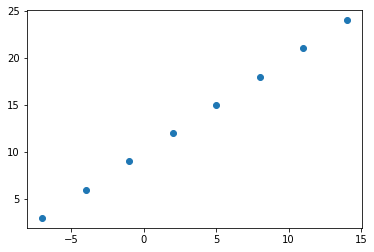

In [127]:
plt.scatter(x,y)

In [128]:
# Check the lenght of how many samples we have
len(X)

50

In [129]:
# Split the data into train and test sets 
X_train = X[:40] # first 40 are training samples (%80 of the data)
Y_train = Y[:40]


X_test = X[40:] # last 10 are testing samples(%20 of the data)
Y_test = Y[40:]



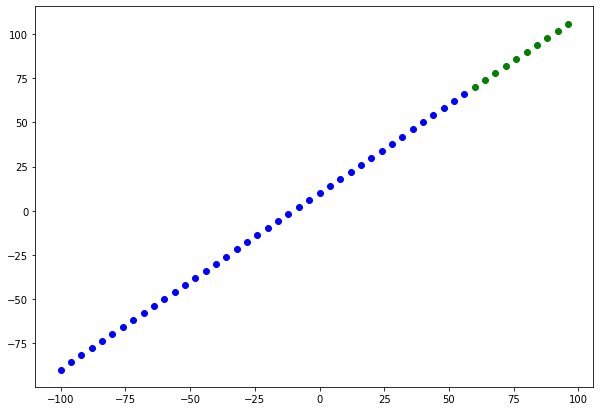

In [130]:
## Visualing the data
plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, c="b", label="Training data")
plt.scatter(X_test,Y_test,c="g",label="Testing data")

In [131]:
# we can improve our model, by altering the steps we took to create a model

# 1. Create a model as above
model= tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")
# input shape = 1 because X[anynumber] equals 1
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(lr=0.01), # optimizer has been changed as Adam
             metrics=["mae"])

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 100)               200       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 101       
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


**Total params** - total number of parameters in the model
**trainable parameters** - these are the parameters the model can update as it trains
**non-trainable parameters** these parameters arent updated during training

In [132]:
# 3. Fit the model (this time we'll train for longer)
model.fit(X_train,Y_train,epochs=100, verbose=0)

In [133]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Visualizing our model's prediction

Make some predictions

In [134]:
y_pred = model.predict(X_test)
y_pred

array([[ 69.55888 ],
       [ 73.53865 ],
       [ 77.51841 ],
       [ 81.498184],
       [ 85.47795 ],
       [ 89.4577  ],
       [ 93.43747 ],
       [ 97.41724 ],
       [101.397   ],
       [105.37677 ]], dtype=float32)

In [135]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [136]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                    train_labels = Y_train,
                    test_data = X_test,
                    test_labels=Y_test,
                    predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels,c="b",label="Training data")
    plt.scatter(test_data,test_labels,c="g",label="Test data")
    plt.scatter(test_data,predictions,c="r",label="Predictions")
    plt.legend()

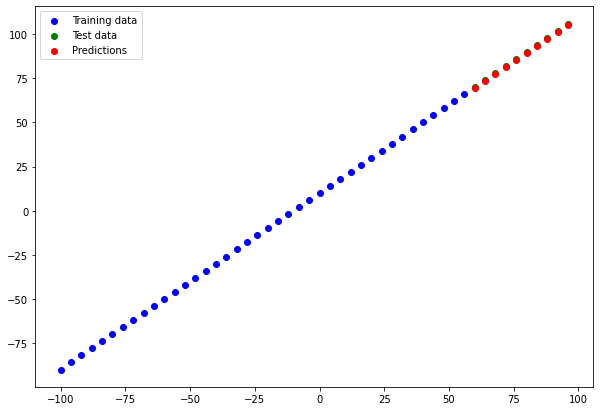

In [137]:
plot_predictions(train_data = X_train,
                    train_labels = Y_train,
                    test_data = X_test,
                    test_labels=Y_test,
                    predictions=y_pred)

Since we are working on a regression, two fo the main metrics:
* MAE- mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE-mean square error, "square the average errors"


In [138]:
# Evaluate the model on the test mode
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 999us/step - loss: 0.5322 - mae: 0.5322


[0.5321792364120483, 0.5321792364120483]

In [139]:
y_pred

array([[ 69.55888 ],
       [ 73.53865 ],
       [ 77.51841 ],
       [ 81.498184],
       [ 85.47795 ],
       [ 89.4577  ],
       [ 93.43747 ],
       [ 97.41724 ],
       [101.397   ],
       [105.37677 ]], dtype=float32)

In [140]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

# Mean Absolute Error

In [141]:
mae = tf.metrics.mean_absolute_error(Y_test,tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.441116, 15.16908 , 12.688954, 11.000727, 10.10441 , 10.      ,
       10.687494, 12.166895, 14.438202, 17.501415], dtype=float32)>

In [142]:
tf.constant(y_pred)
# it has a second dimension, we can get rid of it

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.55888 ],
       [ 73.53865 ],
       [ 77.51841 ],
       [ 81.498184],
       [ 85.47795 ],
       [ 89.4577  ],
       [ 93.43747 ],
       [ 97.41724 ],
       [101.397   ],
       [105.37677 ]], dtype=float32)>

In [143]:
# we get rid of the second dimension. It is in (10,) shape now
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.55888 ,  73.53865 ,  77.51841 ,  81.498184,  85.47795 ,
        89.4577  ,  93.43747 ,  97.41724 , 101.397   , 105.37677 ],
      dtype=float32)>

In [144]:
mae= tf.metrics.mean_absolute_error(Y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.53217393>

# Mean Square Error

In [145]:
def mae(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=y_pred)
def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,y_pred=y_pred)

# Improving the model

In [146]:
# build a model --> fit it --> evaluate it --> tweak it -->> fit it ..

1. Get more data - get more examples for your model to train on
2. Make model larger - more layers
3. Train for longer


In [147]:
X_train,Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

# MODEL 1 (1 LAYER, 100 EPOCHS)

In [148]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#Compile the model

model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# Fit the model
model_1.fit(X_train,Y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 1000us/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 500us/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 500us/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 500us/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 500us/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 499us/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 500us/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 500us/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 501us/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 500us/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [============================

2/2 [==============================] - 0s 501us/step - loss: 9.2433 - mae: 9.2433
Epoch 87/100
2/2 [==============================] - 0s 500us/step - loss: 12.0209 - mae: 12.0209
Epoch 88/100
2/2 [==============================] - 0s 500us/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 500us/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 0s/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 500us/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 501us/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 0s/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 500us/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 500us/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0s 500u

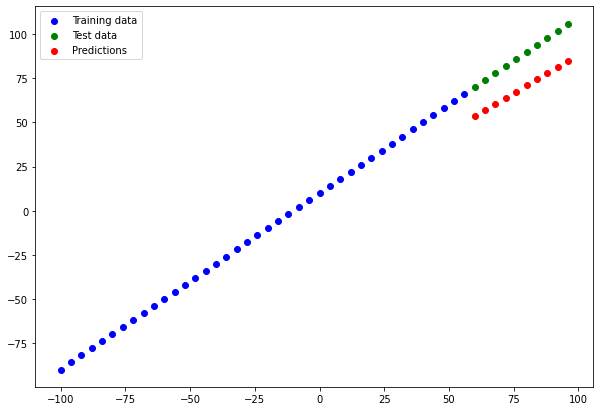

In [149]:
# Make and plot predictions for model_1

y_preds_1 = model_1.predict(X_test)
plot_predictions(train_labels=Y_train,predictions=y_preds_1)

In [150]:
# Calculate evaluation metrics
mae_1= mae(Y_test,tf.squeeze(y_preds_1))
mse_1= mse(Y_test,tf.squeeze(y_preds_1))
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

# MODEL 2 (2 LAYER, 100 EPOCHS)

In [151]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)])

#Compile the model

model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# Fit the model
model_2.fit(X_train,Y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 1ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 500us/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 501us/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 499us/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 500us/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 999us/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 1000us/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 500us/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 0s/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [===========================

2/2 [==============================] - 0s 499us/step - loss: 15.2862 - mae: 15.2862
Epoch 87/100
2/2 [==============================] - 0s 500us/step - loss: 19.1086 - mae: 19.1086
Epoch 88/100
2/2 [==============================] - 0s 500us/step - loss: 29.8228 - mae: 29.8228
Epoch 89/100
2/2 [==============================] - 0s 500us/step - loss: 10.1742 - mae: 10.1742
Epoch 90/100
2/2 [==============================] - 0s 500us/step - loss: 21.5240 - mae: 21.5240
Epoch 91/100
2/2 [==============================] - 0s 499us/step - loss: 10.5716 - mae: 10.5716
Epoch 92/100
2/2 [==============================] - 0s 500us/step - loss: 18.3977 - mae: 18.3977
Epoch 93/100
2/2 [==============================] - 0s 500us/step - loss: 7.4138 - mae: 7.4138
Epoch 94/100
2/2 [==============================] - 0s 499us/step - loss: 17.7380 - mae: 17.7380
Epoch 95/100
2/2 [==============================] - 0s 500us/step - loss: 11.1144 - mae: 11.1144
Epoch 96/100
2/2 [===========================

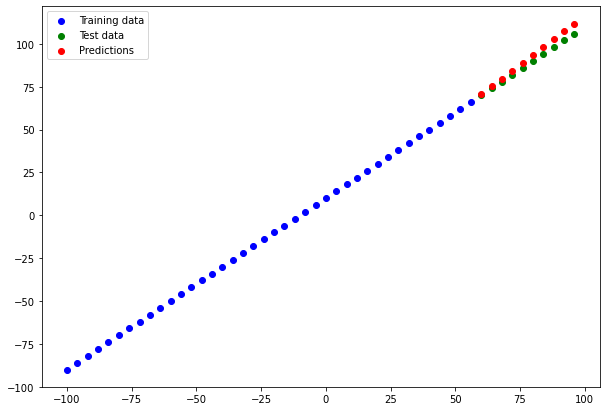

In [152]:
# Visualizing
y_preds_2 = model_2.predict(X_test)
plot_predictions(train_labels=Y_train, predictions=y_preds_2)

In [153]:
# Calculate evaluation metrics
mae_2= mae(Y_test,tf.squeeze(y_preds_2))
mse_2= mse(Y_test,tf.squeeze(y_preds_2))
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

# MODEL 2 (2 LAYER, 500 EPOCHS)

In [154]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([tf.keras.layers.Dense(10),
                              tf.keras.layers.Dense(1)])

#Compile the model

model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])
# Fit the model
model_3.fit(X_train,Y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 998us/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 500us/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 499us/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 500us/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 499us/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 499us/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 499us/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 500us/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 500us/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 499us/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [=====================

2/2 [==============================] - 0s 500us/step - loss: 15.2862 - mae: 15.2862
Epoch 87/500
2/2 [==============================] - 0s 499us/step - loss: 19.1086 - mae: 19.1086
Epoch 88/500
2/2 [==============================] - 0s 0s/step - loss: 29.8228 - mae: 29.8228
Epoch 89/500
2/2 [==============================] - 0s 500us/step - loss: 10.1742 - mae: 10.1742
Epoch 90/500
2/2 [==============================] - 0s 499us/step - loss: 21.5240 - mae: 21.5240
Epoch 91/500
2/2 [==============================] - 0s 0s/step - loss: 10.5716 - mae: 10.5716
Epoch 92/500
2/2 [==============================] - 0s 499us/step - loss: 18.3977 - mae: 18.3977
Epoch 93/500
2/2 [==============================] - 0s 501us/step - loss: 7.4138 - mae: 7.4138
Epoch 94/500
2/2 [==============================] - 0s 0s/step - loss: 17.7380 - mae: 17.7380
Epoch 95/500
2/2 [==============================] - 0s 499us/step - loss: 11.1144 - mae: 11.1144
Epoch 96/500
2/2 [==============================] - 0s

2/2 [==============================] - 0s 500us/step - loss: 10.1499 - mae: 10.1499
Epoch 171/500
2/2 [==============================] - 0s 501us/step - loss: 18.0464 - mae: 18.0464
Epoch 172/500
2/2 [==============================] - 0s 500us/step - loss: 28.8377 - mae: 28.8377
Epoch 173/500
2/2 [==============================] - 0s 0s/step - loss: 16.5280 - mae: 16.5280
Epoch 174/500
2/2 [==============================] - 0s 500us/step - loss: 11.2115 - mae: 11.2115
Epoch 175/500
2/2 [==============================] - 0s 501us/step - loss: 27.5839 - mae: 27.5839
Epoch 176/500
2/2 [==============================] - 0s 0s/step - loss: 8.2680 - mae: 8.2680
Epoch 177/500
2/2 [==============================] - 0s 500us/step - loss: 9.2580 - mae: 9.2580
Epoch 178/500
2/2 [==============================] - 0s 500us/step - loss: 18.1440 - mae: 18.1440
Epoch 179/500
2/2 [==============================] - 0s 502us/step - loss: 10.5995 - mae: 10.5995
Epoch 180/500
2/2 [=========================

2/2 [==============================] - 0s 499us/step - loss: 7.2792 - mae: 7.2792
Epoch 255/500
2/2 [==============================] - 0s 500us/step - loss: 24.7126 - mae: 24.7126
Epoch 256/500
2/2 [==============================] - 0s 500us/step - loss: 12.4220 - mae: 12.4220
Epoch 257/500
2/2 [==============================] - 0s 500us/step - loss: 10.5823 - mae: 10.5823
Epoch 258/500
2/2 [==============================] - 0s 501us/step - loss: 14.4883 - mae: 14.4883
Epoch 259/500
2/2 [==============================] - 0s 500us/step - loss: 8.6132 - mae: 8.6132
Epoch 260/500
2/2 [==============================] - 0s 499us/step - loss: 43.0580 - mae: 43.0580
Epoch 261/500
2/2 [==============================] - 0s 501us/step - loss: 18.4611 - mae: 18.4611
Epoch 262/500
2/2 [==============================] - 0s 0s/step - loss: 6.8820 - mae: 6.8820
Epoch 263/500
2/2 [==============================] - 0s 500us/step - loss: 13.7211 - mae: 13.7211
Epoch 264/500
2/2 [========================

2/2 [==============================] - 0s 0s/step - loss: 19.6832 - mae: 19.6832
Epoch 339/500
2/2 [==============================] - 0s 499us/step - loss: 35.0762 - mae: 35.0762
Epoch 340/500
2/2 [==============================] - 0s 500us/step - loss: 10.4192 - mae: 10.4192
Epoch 341/500
2/2 [==============================] - 0s 500us/step - loss: 9.7625 - mae: 9.7625
Epoch 342/500
2/2 [==============================] - 0s 500us/step - loss: 11.9500 - mae: 11.9500
Epoch 343/500
2/2 [==============================] - 0s 499us/step - loss: 9.3943 - mae: 9.3943
Epoch 344/500
2/2 [==============================] - 0s 501us/step - loss: 5.6071 - mae: 5.6071
Epoch 345/500
2/2 [==============================] - 0s 499us/step - loss: 37.4876 - mae: 37.4876
Epoch 346/500
2/2 [==============================] - 0s 500us/step - loss: 16.8830 - mae: 16.8830
Epoch 347/500
2/2 [==============================] - 0s 500us/step - loss: 12.8748 - mae: 12.8748
Epoch 348/500
2/2 [========================

2/2 [==============================] - 0s 500us/step - loss: 7.8241 - mae: 7.8241
Epoch 423/500
2/2 [==============================] - 0s 499us/step - loss: 25.3789 - mae: 25.3789
Epoch 424/500
2/2 [==============================] - 0s 500us/step - loss: 15.1031 - mae: 15.1031
Epoch 425/500
2/2 [==============================] - 0s 499us/step - loss: 7.1643 - mae: 7.1643
Epoch 426/500
2/2 [==============================] - 0s 500us/step - loss: 20.3318 - mae: 20.3318
Epoch 427/500
2/2 [==============================] - 0s 0s/step - loss: 6.3283 - mae: 6.3283
Epoch 428/500
2/2 [==============================] - 0s 500us/step - loss: 12.9962 - mae: 12.9962
Epoch 429/500
2/2 [==============================] - 0s 499us/step - loss: 10.7869 - mae: 10.7869
Epoch 430/500
2/2 [==============================] - 0s 500us/step - loss: 11.4007 - mae: 11.4007
Epoch 431/500
2/2 [==============================] - 0s 500us/step - loss: 10.6153 - mae: 10.6153
Epoch 432/500
2/2 [========================

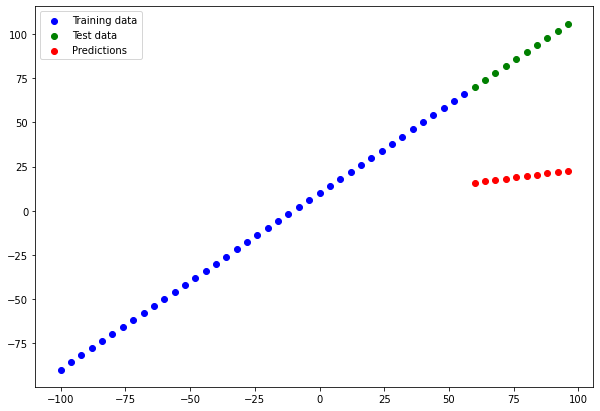

In [155]:
# Visualizing
y_preds_3 = model_3.predict(X_test)
plot_predictions(train_labels=Y_train, predictions=y_preds_3)

In [157]:
# Calculate evaluation metrics
mae_3= mae(Y_test,tf.squeeze(y_preds_3))
mse_3= mse(Y_test,tf.squeeze(y_preds_3))
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

# Saving the Model

Saving our models allows us to use them outside of Jupyter Notebook.
1- The SavedModel format
2- The HDF5 format

In [158]:
model_2.save("best_model_SavedModel_format")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [161]:
# HDF5 format
model_2.save("best_model_HDF5_format.h5")